### **Automatic Differentiation**

Let’s take a look at how autograd collects gradients. We create two tensors a and b with requires_grad=True. This signals to autograd that every operation on them should be tracked.

In [1]:
import torch 

a = torch.tensor([2.,3.],requires_grad=True)
print(a)

print( )
b = torch.tensor([6.,4.],requires_grad=True)
print(b)

tensor([2., 3.], requires_grad=True)

tensor([6., 4.], requires_grad=True)


We create another tensor Q from a and b.
Q=3a^3−b^2

In [2]:
Q = 3*a**3 - b**2
print(Q)

tensor([-12.,  65.], grad_fn=<SubBackward0>)


Let’s assume a and b to be parameters of an NN, and Q to be the error. In NN training, we want gradients of the error w.r.t. parameters, i.e.

∂Q/∂a = 9a^2

∂Q/∂b = -2b
 
When we call .backward() on Q, autograd calculates these gradients and stores them in the respective tensors’ .grad attribute.

We need to explicitly pass a gradient argument in Q.backward() because it is a vector. gradient is a tensor of the same shape as Q, and it represents the gradient of Q w.r.t. itself, i.e.

dQ/dQ = 1

Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like Q.sum().backward().

In [3]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

Gradients are now deposited in a.grad and b.grad

In [4]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### **Dataset Creation**

In [5]:
# Python code demonstrate creating DataFrame from dict narray / lists By default addresses.
 
import pandas as pd
 
# intialise data of lists.
data = {'Name':['Nikhil', 'Paras', 'krish', 'Rohit'],
        'Age':[20, 21, 19, 18]}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

     Name  Age
0  Nikhil   20
1   Paras   21
2   krish   19
3   Rohit   18


In [6]:
from torch.utils.data import Dataset, DataLoader
import numpy as np

# creating a class for our dataset
class WholeSaleDataset(Dataset):
    # constructor of the class WholeSaleDataset
    def __init__(self):
        df = np.loadtxt(r'wholesale.csv',delimiter=",",skiprows=1,dtype=int)
        self.d = df
        self.nsample = df.shape[0]
    # to get the item of the particular index
    def __getitem__(self, index):
        return self.d[index]
    # to get the length 
    def __len__(self):
        return self.nsample

In [7]:
# creating an object of WholeSaleDataset()
data = WholeSaleDataset()

In [8]:
# printing the first 5 rows of the dataset
data[0:5]

array([[    2,     3, 12669,  9656,  7561,   214,  2674,  1338],
       [    2,     3,  7057,  9810,  9568,  1762,  3293,  1776],
       [    2,     3,  6353,  8808,  7684,  2405,  3516,  7844],
       [    1,     3, 13265,  1196,  4221,  6404,   507,  1788],
       [    2,     3, 22615,  5410,  7198,  3915,  1777,  5185]])

In [9]:
# printing the last 5 rows of the dataset
data[-4:]

array([[    1,     3, 39228,  1431,   764,  4510,    93,  2346],
       [    2,     3, 14531, 15488, 30243,   437, 14841,  1867],
       [    1,     3, 10290,  1981,  2232,  1038,   168,  2125],
       [    1,     3,  2787,  1698,  2510,    65,   477,    52]])

In [10]:
# number of samples in the dataset
data.__len__()

440

In [11]:
# getting the second row of the dataset 
# we passed 1 as indexing starts from 0
data.__getitem__(1)

array([   2,    3, 7057, 9810, 9568, 1762, 3293, 1776])

### **Data Loader**

In [12]:
import pandas as pd

df = pd.read_csv (r'Salary_Data.csv')
df.head

<bound method NDFrame.head of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [13]:
# printing the names of the columns
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

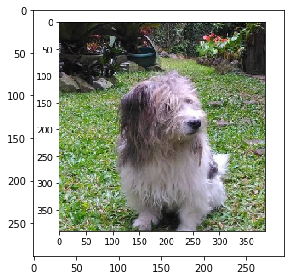

In [14]:
from skimage.io import imshow, imread
doggo = imread('doggo.png')
imshow(doggo);